In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/abhijeetthombare/ab_lib/Projects/EdX_DS_stat/Advertising.csv")


In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8


In [ ]:
# Set the 'TV' column as predictor variable
x = df[["TV"]].values

# Set the 'Sales' column as response variable
y = df["Sales"].values

In [ ]:
### edTest(test_shape) ###
# Split the dataset in training and testing with 60% training set and
# 40% testing set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.6, random_state=66
)


In [ ]:
### edTest(test_nums) ###
# Choosing k range from 1 to 70
k_value_min = 1
k_value_max = 70

# Create a list of integer k values between k_value_min and
# k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, num=70, dtype=int)


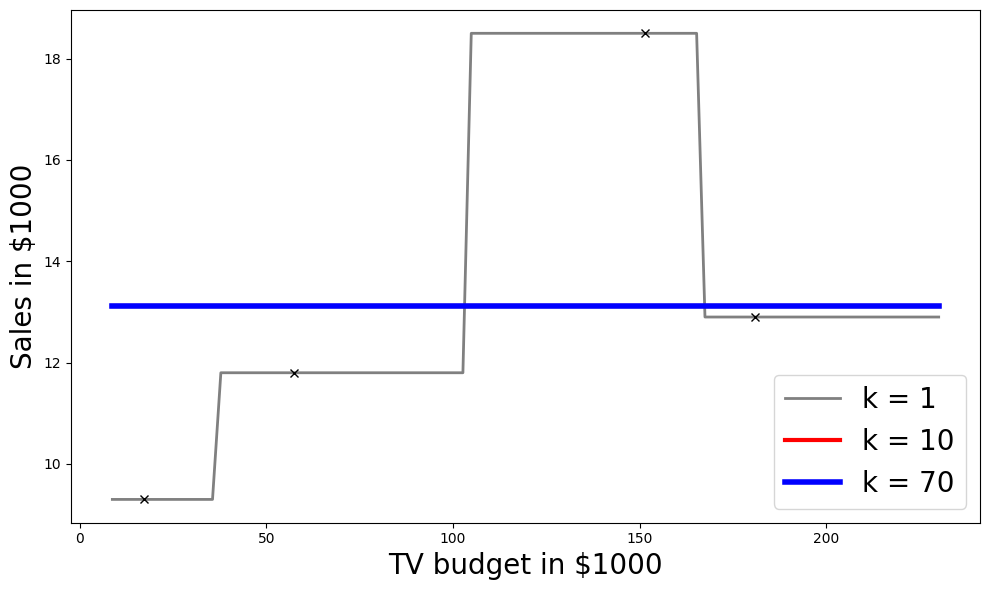

In [ ]:
# Setup a grid for plotting the data and predictions
fig, ax = plt.subplots(figsize=(10, 6))

# Create a dictionary to store the k value against MSE fit {k: MSE@k}
knn_dict = {}

# Variable used for altering the linewidth of values kNN models
j = 0

# Loop over all k values
for k_value in k_list:
    # Create a KNN Regression model for the current k
    n_neighbors = min(int(k_value), x_train.shape[0])  # Ensure k is valid
    model = KNeighborsRegressor(n_neighbors=n_neighbors)

    # Fit the model on the train data
    model.fit(x_train, y_train)

    # Use the trained model to predict on the test data
    y_pred = model.predict(x_test)

    # Calculate the MSE of the test data predictions
    MSE = np.mean((y_pred - y_test) ** 2)

    # Store the MSE values of each k value in the dictionary
    knn_dict[k_value] = MSE

    # Helper code to plot the data and various kNN model predictions
    colors = ["grey", "r", "b"]
    if k_value in [1, 10, 70]:
        xvals = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
        ypreds = model.predict(xvals)
        ax.plot(
            xvals,
            ypreds,
            "-",
            label=f"k = {int(k_value)}",
            linewidth=j + 2,
            color=colors[j],
        )
        j += 1

ax.legend(loc="lower right", fontsize=20)
ax.plot(x_train, y_train, "x", label="test", color="k")
ax.set_xlabel("TV budget in $1000", fontsize=20)
ax.set_ylabel("Sales in $1000", fontsize=20)
plt.tight_layout()


In [12]:
print(f"Training samples: {x_train.shape[0]}, k_value: {k_value}")

Training samples: 4, k_value: 70


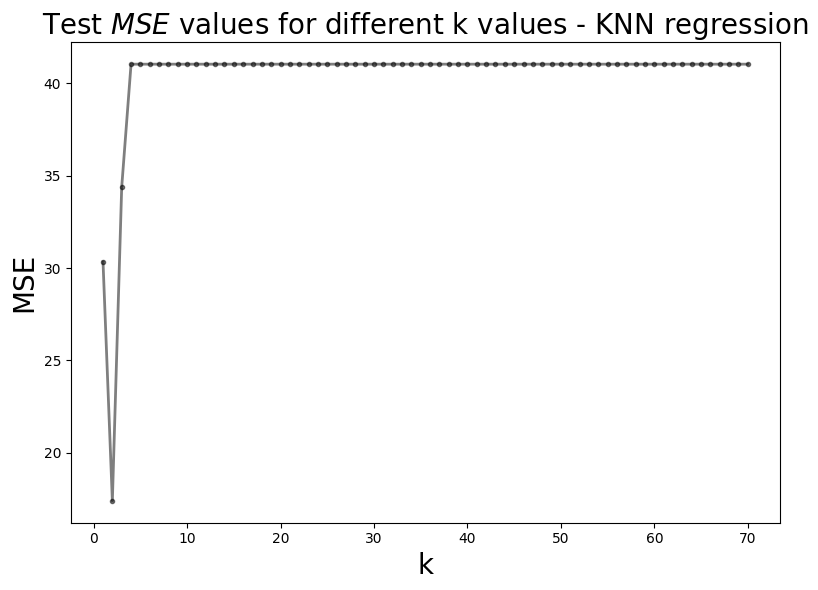

In [ ]:
# Plot a graph which depicts the relation between the k values and MSE
plt.figure(figsize=(8, 6))
plt.plot(list(knn_dict.keys()), list(knn_dict.values()), "k.-", alpha=0.5, linewidth=2)

# Set the title and axis labels
plt.xlabel("k", fontsize=20)
plt.ylabel("MSE", fontsize=20)
plt.title("Test $MSE$ values for different k values - KNN regression", fontsize=20)
plt.tight_layout()


In [ ]:
### edTest(test_mse) ###

# Find the lowest MSE among all the kNN models
min_mse = min(knn_dict.values())

# Use list comprehensions to find the k value associated with the lowest MSE
best_model = [key for (key, value) in knn_dict.items() if value == min_mse]

# Print the best k-value
print("The best k value is ", best_model, "with a MSE of ", min_mse)


The best k value is  [np.int64(2)] with a MSE of  17.401666666666678


In [ ]:
# Helper code to compute the R2_score of your best model
model = KNeighborsRegressor(n_neighbors=best_model[0])
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)

# Print the R2 score of the model
print(f"The R2 score for your model is {r2_score(y_test, y_pred_test)}")


The R2 score for your model is 0.5757300753101802
